# USNCCM15 Short Course
# SC15-005: Machine Learning Data-Driven Discretization Theories, Modeling and Applications

# Hands-on tutorial on Supervised Learning with Neural Networks in Tensorflow 
## Instructor: Paris Perdikaris, pgp@seas.upenn.edu
## Code repository: https://github.com/PredictiveIntelligenceLab/USNCCM15-Short-Course-Recent-Advances-in-Physics-Informed-Deep-Learning

# Supervised Learning
Supervised learning is one of the most widely deployed machine learning technologies, and a particular domain of success has been classification. Classification is the process of taking an input (which might be an image) and categorizing it into one of a number of different classes (e.g. dog or cat). This simple idea underpins a lot of machine learning. By scanning across the image we can also determine where the animal is in the image.

Classification is perhaps the technique most closely assocated with machine learning. In the speech based agents, on-device classifiers are used to determine when the wake word is used. A wake word is a word that wakes up the device. For the Amazon Echo it is “Alexa”, for Siri it is “Hey Siri”. Once the wake word detected with a classifier, the speech can be uploaded to the cloud for full processing, the speech recognition stages.

A major breakthrough in image classification came in 2012 with the ImageNet result of Alex Krizhevsky, Ilya Sutskever and Geoff Hinton from the University of Toronto. ImageNet is a large data base of 14 million images with many thousands of classes. The data is used in a community-wide challenge for object categorization. Krizhevsky et al used convolutional neural networks to outperform all previous approaches on the challenge. They formed a company which was purchased shortly after by Google. This challenge, known as object categorisation, was a major obstacle for practical computer vision systems. Modern object categorization systems are close to human performance.

In supervised learning the inputs, $x$, are mapped to a output/label, $y$, through a function $f_{\theta}(⋅)$ that is dependent on a set of parameters, $\theta$,
$$
y=f_{\theta}(x).
$$
The function $f_{\theta}(⋅)$ is known as the prediction function. The key challenges are (1) choosing which features, $x$, are relevant in the prediction, (2) defining the appropriate class of function, $f_{\theta}(⋅)$, to use and (3) selecting the right parameters, $\theta$.

# Feature Selection
Feature selection is a critical stage in the algorithm design process. The features we select should be ones we expect to correlate with the prediction. In statistics, these features are even called predictors which highlights their role in developing the prediction function. For Facebook newsfeed, we might use features that include how close your friendship is with the poster, or how often you react to that poster, or whether a photo is included in the post.

Sometimes we use feature selection algorithms, algorithms that automate the process of finding the features that we need. Classification is often used to rank search results, to decide which adverts to serve or, at Facebook, to determine what appears at the top of your newsfeed. In the Facebook example features might include how many likes a post has had, whether it has an image in it, whether you regularly interact with the friend who has posted. A good newsfeed ranking algorithm is critical to Facebook’s success, just as good ad serving choice is critical to Google’s success. These algorithms are in turn highly dependent on the feature sets used. Facebook in particular has made heavy investments in machine learning pipelines for evaluation of the feature utility.

## Class of Function, $f_{\theta}(⋅)$
By class of function we mean, what are the characteristics of the mapping between $x$ and $y$. Often we might choose it to be a smooth function. Sometimes we will choose it to be a linear function. If the prediction is a forecast, for example the demand of a particular product, then the function would need some periodic components to reflect seasonal or weekly effects.

In the ImageNet challenge the input, $x$, was in the form of an image. And the form of the prediction function was a convolutional neural network (more on this later). A convolutional neural network introduces invariances into the function that are particular to image classification. An invariance is a transformation of the input that we don’t want to effect the output. For example, a cat in an image is still a cat no matter where it’s located in the image (translation). The cat is also a cat regardless of how large it is (scale), or whether it’s upside-down (rotation). Convolutional neural networks encode these invariances: scale invariance, rotation invariance and translation invariance; in the mathematical function.

Encoding invariance in the prediction function is like encoding knowledge in the model. If we don’t specify these invariances then the model must learn them. This will require a lot more data to achieve the same performance, making the model less data efficient. Note that one invariance that is not encoded in a convolutional network is invariance to camera type. As a result practitioners need to be careful to ensure that their training data is representative of the type of cameras that will be used when the model is deployed. Physical conservation laws expressed by differential equations can be thought of as informative prior constraints for encoding such inductive biases into a class of parametrized functions $f_{\theta}(⋅)$.

In general the prediction function could be any set of parameterized functions. Neural networks in particular, 
are adaptive non-linear function models. Originally, they were studied (by McCulloch and Pitts (McCulloch and Pitts 1943)) as simple models for neurons, but over the last decade they have become popular because they are a flexible approach to modelling complex data. A particular characteristic of neural network models is that they can be composed to form highly complex functions which encode many of our expectations of the real world. They allow us to encode our assumptions about how the world works.

We will return to composition later, but for the moment, let's focus on a one hidden layer neural network. We are interested in the prediction function, so we'll ignore the objective function (which is often called an error function) for the moment, and just describe the mathematical object of interest


$$f_{\theta}(x)=W^{T}\phi(V,x), \ \ \theta:=\{V,W\}.$$


Where in this case $f_{\theta}(⋅)$ is a scalar function with vector inputs, and $\phi(⋅)$ is a vector function with vector inputs. The dimensionality of the vector function is known as the number of hidden units, or the number of neurons. The elements of this vector function are known as the activation function of the neural network and $V$ are the parameters of the activation functions. In scientific computing, activation functions are traditionally known as basis functions. And we would think of this as a linear model. It's doesn't make linear predictions, but it's linear because in statistics estimation focuses on the parameters, $W$, not the parameters, $V$. The linear model terminology refers to the fact that the model is linear in the parameters $W$, but it is not linear in the data unless the activation functions are chosen to be linear.





## Parameter Estimation
Once we have a set of features and the class of functions we use is determined we need to find the parameters of the model.

For the simple neural network model discussed in the previous section, the parameters $\theta:=\{V,W\}$, are estimated by specifying an objective function. The objective function specifies the quality of the match between the prediction function and the training data. In supervised learning the objective function incorporates both the input data and an output/label.

The label is where the term supervised learning comes from. The idea being that a supervisor, or annotator, has already looked at the data and given it labels. For regression problem, a typical objective function is the squared error,

$$\mathcal{L}(\theta)=\frac{1}{N}\sum\limits_{i=1}^{N}(y_i−f_{\theta}(x_i))^2,$$

where the data is provided to us as a set of n inputs, $x_1, x_2, x_3, \dots, x_n$ each one with an associated label, $y_1, y_2, y_3, \dots, y_n$. Sometimes the output is cheap to acquire. For example in Newsfeed ranking Facebook are acquiring a label each time a user clicks on a post in their Newsfeed. Similarly in ad-click prediction labels are obtained whenever an advert is clicked. More generally though, we have to employ human annotators to label the data. For example, ImageNet, the breakthrough deep learning result was annotated using Amazon’s Mechanical Turk. Without such large scale human input we would not have the breakthrough results on image categorization we have today. The quality of any machine learning solution is very sensitive to the quality of annotated data we have. However, in other tasks, labeled data may be hard or expensive to acquire. In such data-scarce regimes, black-box over-parametrized models such as neural networks will struggle to return accurate predictions due to overfitting (see discussion below).

There can also be significant problems with misrepresentation in the data set. If data isn’t collected carefully, then it can reflect biases about the population that we don’t want our models to have. For example, if we design a face detector using Californians may not perform well when deployed in Kampala, Uganda.

## Generalization and Overfitting
Once a supervised learning system is trained it can be placed in a sequential pipeline to automate a process that used to be done manually.

Supervised learning is one of the dominant approaches to learning. But the cost and time associated with labeling data is a major bottleneck for deploying machine learning systems. The process for creating training data requires significant human intervention. For example, internationalization of a speech recognition system would require large speech corpora in new languages.

An important distinction in machine learning is the separation between training data and test data. Training data is the data that was used to find the model parameters. Test data is the data that is used with the live system. The ability of a machine learning system to predict well on production systems given only its training data is known as its generalization ability. This is the system’s ability to predict in areas where it hasn’t previously seen data.

We can easily develop a simple prediction function that reconstructs the training data exactly, you can just use a look up table. But how would the lookup table predict between the training data, where examples haven’t been seen before? The choice of the class of prediction functions is critical in ensuring that the model generalizes well.

The generalization error is normally estimated by applying the objective function to a set of data that the model wasn’t trained on, the test data. To ensure good performance we normally want a model that gives us a low generalization error. If we weren’t sure of the right prediction function to use then we could try 1,000 different prediction functions. Then we could use the one that gives us the lowest error on the test data. But you have to be careful. Selecting a model in this way is like a further stage of training where you are using the test data in the training. So when this is done, the data used for this is not known as test data, it is known as validation data. And the associated error is the validation error. Using the validation error for model selection is a standard machine learning technique, but it can be misleading about the final generalization error. Almost all machine learning practitioners know not to use the test data in your training procedure, but sometimes people forget that when validation data is used for model selection that validation error cannot be used as an unbiased estimate of the generalization performance.



# Tensorflow
TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. TensorFlow offers multiple levels of abstraction so you can choose the right one for your needs. Build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.

If you need more flexibility, eager execution allows for immediate iteration and intuitive debugging. For large ML training tasks, use the Distribution Strategy API for distributed training on different hardware configurations without changing the model definition. 

Tensorflow allow us to repidly build and train state-of-the-art models without sacrificing speed or performance. For easy prototyping and fast debugging, TensorFlow also supports an ecosystem of powerful add-on libraries and models to experiment with, including Ragged Tensors, TensorFlow Probability, Tensor2Tensor and BERT.



# Neural networks in Tensorflow
To highlight different implementation aspects, let us now consider a training a simple fully connected neural network on a two-dimensional regression problem.

All elements defining our neural network implementation can be summarized in the following Tensorflow class. Here we assume that the reader is familiar with the basic Tensorflow structure and semantics. For a primer on Tensorflow please consider the series of tutorials presented [here](https://github.com/aymericdamien/TensorFlow-Examples).

In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D

# Fix the random seed for reproducibility
np.random.seed(1234)
tf.set_random_seed(1234)

/Users/paris/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
'''
A basic Tensorflow class for supervised regression with deep neural networks
'''
class NeuralNetRegression:
    # Initialize the class
    def __init__(self, X, Y, layers):
        
        # Normalization constants
        self.Xmean, self.Xstd = X.mean(0), X.std(0)
        self.Ymean, self.Ystd = Y.mean(0), Y.std(0)
        
        # Normalize inputs/outputs to zero mean and unit variance
        X = (X - self.Xmean)/self.Xstd
        Y = (Y - self.Ymean)/self.Ystd
        
        # Store training data
        self.X = X
        self.Y = Y
        
        self.N = X.shape[0]
        self.layers = layers

        # Initialize network weights and biases        
        self.weights, self.biases = self.initialize_NN(layers)
        
        # Define Tensorflow session
        self.sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
        
        # Define placeholders and computational graph
        self.X_tf = tf.placeholder(tf.float32, shape=(None, self.X.shape[1]))
        self.Y_tf = tf.placeholder(tf.float32, shape=(None, self.Y.shape[1]))
        
        # Evaluate prediction
        self.Y_pred = self.neural_net(self.X_tf)
        
        # Evaluate loss
        self.loss = tf.reduce_mean(tf.square(self.Y_tf - self.Y_pred))
        
        # Define optimizer        
        self.optimizer = tf.train.AdamOptimizer(1e-3)
        self.train_op = self.optimizer.minimize(self.loss)
        
        # Logger
        self.loss_log = []
        self.saver = tf.train.Saver()
        
        # Initialize Tensorflow variables
        init = tf.global_variables_initializer()
        self.sess.run(init)

    
    # Initialize network weights and biases using Xavier initialization
    def initialize_NN(self, layers):      
        # Xavier initialization
        def xavier_init(size):
            in_dim = size[0]
            out_dim = size[1]
            xavier_stddev = 1. / np.sqrt((in_dim + out_dim) / 2.)
            return tf.Variable(tf.random_normal([in_dim, out_dim], dtype=tf.float32) * xavier_stddev, dtype=tf.float32)   
        
        weights = []
        biases = []
        num_layers = len(layers) 
        for l in range(0,num_layers-1):
            W = xavier_init(size=[layers[l], layers[l+1]])
            b = tf.Variable(tf.zeros([1,layers[l+1]], dtype=tf.float32), dtype=tf.float32)
            weights.append(W)
            biases.append(b)        
        return weights, biases
       
           
    
     # Evaluates the forward pass
    def forward_pass(self, H, layers, weights, biases):
        num_layers = len(layers)
        for l in range(0,num_layers-2):
            W = weights[l]
            b = biases[l]
            H = tf.tanh(tf.add(tf.matmul(H, W), b))
        W = weights[-1]
        b = biases[-1]
        H = tf.add(tf.matmul(H, W), b)
        return H
    
            
    def neural_net(self, x):
        u = self.forward_pass(x, 
                              self.layers,
                              self.weights, 
                              self.biases)
        return u
    
    
    # Fetches a mini-batch of data
    def fetch_minibatch(self,X, Y, N_batch):
        idx = np.random.choice(self.N, N_batch, replace=False)
        X_batch = X[idx,:]
        Y_batch = Y[idx,:]        
        return X_batch, Y_batch
    
    
    # Trains the model by minimizing the MSE loss
    def train(self, nIter = 10000, batch_size = 128): 

#         start_time = timeit.default_timer()
        for it in tqdm(range(nIter)):     
            # Fetch a mini-batch of data
            X_batch, Y_batch = self.fetch_minibatch(self.X, self.Y, batch_size)
            
            # Define a dictionary for associating placeholders with data
            tf_dict = {self.X_tf: X_batch, self.Y_tf: Y_batch}  
            
            # Run the Tensorflow session to minimize the loss
            self.sess.run(self.train_op, tf_dict)
            
            # Print
            if it % 50 == 0:
#                 elapsed = timeit.default_timer() - start_time
                loss_value = self.sess.run(self.loss, tf_dict)
                self.loss_log.append(loss_value)
#                 print('It: %d, Loss: %.3e, Time: %.2f' % 
#                       (it, loss_value, elapsed))
#                 start_time = timeit.default_timer()
                
                
    # Evaluates predictions at test points           
    def predict(self, X_star):  
        # Normalize inputs
        X_star = (X_star - self.Xmean)/self.Xstd
        tf_dict = {self.X_tf: X_star}       
        Y_star = self.sess.run(self.Y_pred, tf_dict) 
        # De-normalize outputs
        Y_star = Y_star*self.Ystd + self.Ymean
        return Y_star

# Example simulation

Now we are ready to set up and train our first deep neural network using Tensorflow. To this end, let us generate a set of $N$ input/output observations $\{x_i,y_i\}$, $i=1,\dots,N$ using a Latin Hypercube Sampling of the following non-trivial function:

$$ f(x_1,x_2) = x_1 x_2 \sqrt{|\cos(\pi x_1) \cos(\pi x_2)|}, \ x_1,x_2\in[50,54]^2, $$

and train a deep neural network with three hidden layers, 50 neurons per layer, and a hyperbolic tangent activation function to approximate $y = f(x_1,x_2)$.

In [3]:
# Number of training data pairs
N = 2000

# Noise level corrupting the observed outputs
noise = 0.05

# Generate Training Data   
def f(x1,x2):
    return x1*x2*np.sqrt(np.abs(np.cos(np.pi*x1)*np.cos(np.pi*x2)))

# Specify input domain bounds
lb = 50.0*np.ones(2)
ub = 54.0*np.ones(2) 

# Generate data
X = lb + (ub-lb)*lhs(2, N)
y = f(X[:,0], X[:,1])[:,None] 
y = y + np.std(y)*noise*np.random.randn(N,1)

# Generate Test Data
nn = 200
xx = np.linspace(lb[0], ub[0], nn)
yy = np.linspace(lb[1], ub[1], nn)
XX, YY = np.meshgrid(xx,yy)
X_star = np.concatenate([XX.flatten()[:,None], YY.flatten()[:,None]], axis = 1)
y_star = f(X_star[:,0], X_star[:,1])[:,None]

In [4]:
# Fully-connected neural net architecture (dimensions of each layer)
layers = [2,50,50,50,1]
#  Define neural net model
model = NeuralNetRegression(X, y, layers)   

In [5]:
# Train model using mini batch stochasitc gradient descent
model.train(nIter = 60000, batch_size = 128)

100%|██████████| 60000/60000 [01:11<00:00, 833.48it/s]


In [6]:
# Prediction
y_pred = model.predict(X_star)
# Relative L2 test error
error = np.linalg.norm(y_star - y_pred, 2)/np.linalg.norm(y_star, 2)
print('Relative L2 error_u: %e' % (error))

Relative L2 error_u: 4.578106e-02


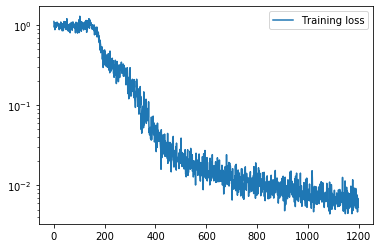

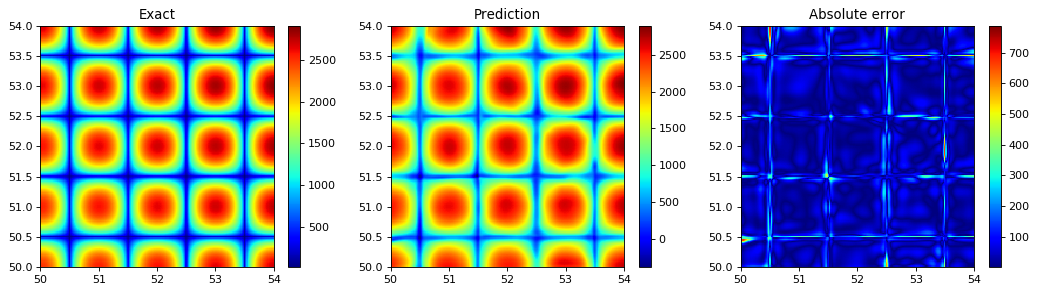

In [7]:
# Plotting
Y_star_plot = griddata(X_star, y_star.flatten(), (XX, YY), method='cubic')
Y_pred_plot = griddata(X_star, y_pred.flatten(), (XX, YY), method='cubic')

fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.plot(model.loss_log, label = 'Training loss')
ax.set_yscale('log')
plt.legend()

plt.figure(2,figsize=(16, 4), dpi=80, facecolor='w', edgecolor='w')
plt.subplot(1,3,1)
plt.pcolor(XX,YY,Y_star_plot, cmap = 'jet')
plt.title('Exact')
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolor(XX,YY,Y_pred_plot, cmap = 'jet')
plt.title('Prediction')
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolor(XX,YY,np.abs(Y_star_plot-Y_pred_plot), cmap = 'jet')
plt.title('Absolute error')
plt.colorbar()